In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
import warnings
warnings.filterwarnings("ignore")

#### Data Loading and cleaning

In [2]:
# Loading the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot: xlabel='Age', ylabel='Count'>

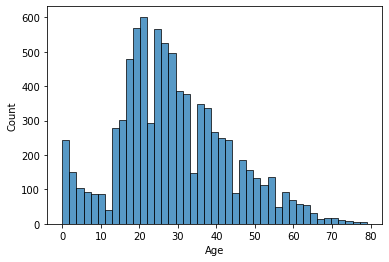

In [4]:
sns.histplot(train_data['Age'])

<AxesSubplot: xlabel='HomePlanet', ylabel='RoomService'>

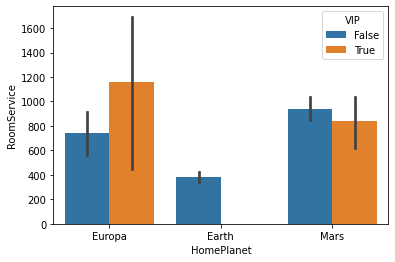

In [5]:
sns.barplot(y='RoomService',x="HomePlanet",hue='VIP', data=train_data, estimator=np.std)

<AxesSubplot: xlabel='HomePlanet', ylabel='FoodCourt'>

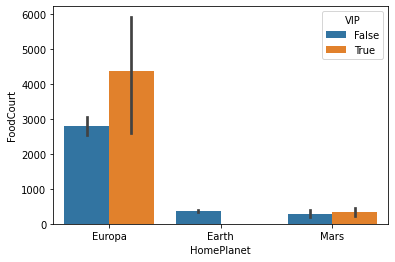

In [6]:
sns.barplot(y='FoodCourt',x='HomePlanet',hue='VIP', data=train_data, estimator=np.std)

<AxesSubplot: xlabel='HomePlanet', ylabel='ShoppingMall'>

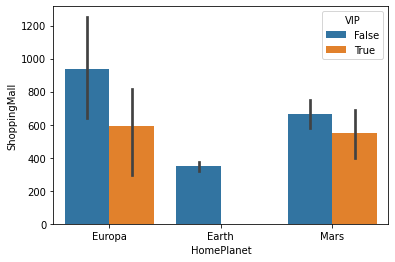

In [7]:
sns.barplot(y='ShoppingMall',x='HomePlanet',hue='VIP', data=train_data, estimator=np.std)

<AxesSubplot: xlabel='HomePlanet', ylabel='Spa'>

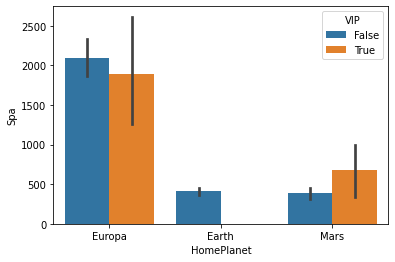

In [8]:
sns.barplot(y='Spa',x='HomePlanet',hue='VIP',data=train_data, estimator=np.std)

<AxesSubplot: xlabel='HomePlanet', ylabel='VRDeck'>

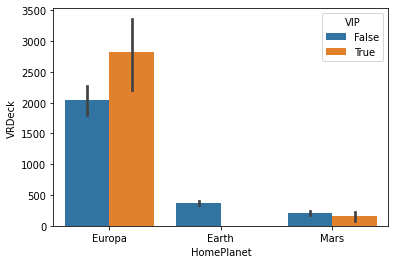

In [9]:
sns.barplot(y='VRDeck',x='HomePlanet',hue='VIP', data=train_data, estimator=np.std)

<AxesSubplot: xlabel='HomePlanet', ylabel='ShoppingMall'>

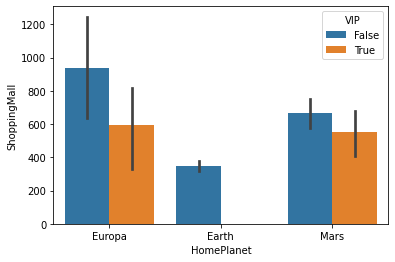

In [10]:
sns.barplot(y='ShoppingMall',x='HomePlanet',hue='VIP',data=train_data, estimator=np.std)

In [11]:
print(train_data.shape)
print(test_data.shape)

(8693, 14)
(4277, 13)


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
# Checking for the null values
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
# Function to substitute mean for null values based on other column data

def mean_maker(df,col1,col2):
    dic = {}
    li = df[col1].unique()

    for i in range(len(li)):
        try:
            dic[li[i]] = int(df[df[col1] == li[i]][col2].mean())
        except ValueError:
            dic[li[i]] = int((df[df[col1].isnull() == True][col2]).mean())

    return dic

In [15]:
# Function to substitute mode for null values based on other column data

def mode_maker(df,col1,col2):
    dic = {}
    li = df[col1].unique()

    for i in range(len(li)):
        try:
            dic[li[i]] = int(df[df[col1] == li[i]][col2].mode()[0])
        except ValueError:
            dic[li[i]] = int(df[col2]).mode()[0]

    return dic

In [16]:
# Filling null values in columns using Home Planet column

for colum in ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'] :
    dictionary_ = mean_maker(train_data,'HomePlanet',colum)
    train_data[colum].fillna(train_data['HomePlanet'].map(dictionary_), inplace=True)
    train_data.drop(train_data.index[train_data[colum].isnull() == True], inplace=True)

In [17]:
# Splitting Cabin column into Cabin_deck, Cabin_number, Cabin_class
train_data[['Cabin_deck','Cabin_number','Cabin_class']] = train_data['Cabin'].str.split('/',expand=True)

# Dropping columns
train_data = train_data.drop(columns=['Cabin','Name','PassengerId'])

In [18]:
# Label encoder for non-numerical data
le = LabelEncoder()
train_data['Cabin_deck'] = le.fit_transform(train_data['Cabin_deck'])
train_data['Cabin_class'] = le.fit_transform(train_data['Cabin_class'])
train_data['HomePlanet'] = le.fit_transform(train_data['HomePlanet'])
train_data['Destination'] = le.fit_transform(train_data['Destination'])


In [19]:
dic_tf = {
    True:int(1),
    False:int(0)
}

# Converting boolean data into 0 and 1
train_data.replace({'CryoSleep':dic_tf, 'Transported':dic_tf, 'VIP':dic_tf}, inplace=True)

In [20]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_number,Cabin_class
0,1,0.0,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,0.0,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,1,0.0,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,1,0.0,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,0,0.0,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


In [21]:
# Filling null values in columns using Home Planet column
for colum in ['Cabin_deck','Cabin_number','Cabin_class','CryoSleep','VIP'] :
    dictionary_ = mode_maker(train_data,'HomePlanet',colum)
    train_data[colum].fillna(train_data['HomePlanet'].map(dictionary_), inplace=True)
    train_data.drop(train_data.index[train_data[colum].isnull() == True], inplace=True)

In [22]:
input_cols = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin_deck','Cabin_number','Cabin_class']
output_cols = ["Transported"]

X = train_data[input_cols]
Y = train_data[output_cols]

print(X.shape,Y.shape)
print(type(X))

(8693, 13) (8693, 1)
<class 'pandas.core.frame.DataFrame'>


In [23]:
# Train test splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6954, 13) (6954, 1)
(1739, 13) (1739, 1)


#### Training 

In [34]:
#list of classifiers
classifiers = [
    SVC(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    
]

In [35]:
for classifier in classifiers:
    #fit the classifier on data
    classifier.fit(X_train,Y_train)
    #store the prediction in a pred variable
    pred = classifier.predict(X_test)
    print("Accuracy of the :", classifier,accuracy_score(Y_test,pred))

Accuracy of the : SVC() 0.7837837837837838
Accuracy of the : LogisticRegression() 0.7682576193214491
Accuracy of the : KNeighborsClassifier() 0.7464059804485337
Accuracy of the : GaussianNB() 0.7073030477285797
Accuracy of the : DecisionTreeClassifier() 0.7469810235767682
Accuracy of the : RandomForestClassifier() 0.7993099482461185


*RandomForestClassifier() has best accuracy*

In [36]:
raw_data = pd.read_csv('test.csv')
raw_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [37]:
raw_data.shape

(4277, 13)

In [38]:
clean_data = raw_data.drop(columns=['Name','PassengerId'])

In [39]:
clean_data[['Cabin_deck','Cabin_number','Cabin_class']] = clean_data['Cabin'].str.split('/',expand=True)
clean_data = clean_data.drop(columns=['Cabin'])

In [40]:
clean_data.replace({'CryoSleep':dic_tf,'VIP':dic_tf}, inplace=True)

In [41]:
for colum in ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'] :
    dictionary_ = mean_maker(clean_data,'HomePlanet',colum)
    clean_data[colum].fillna(clean_data['HomePlanet'].map(dictionary_), inplace=True)
    # clean_data.drop(clean_data.index[clean_data[colum].isnull() == True], inplace=True)

In [42]:
clean_data['Cabin_deck'] = le.fit_transform(clean_data['Cabin_deck'])
clean_data['Cabin_class'] = le.fit_transform(clean_data['Cabin_class'])
clean_data['HomePlanet'] = le.fit_transform(clean_data['HomePlanet'])
clean_data['Destination'] = le.fit_transform(clean_data['Destination'])

In [43]:
for colum in ['Cabin_deck','Cabin_number','Cabin_class','CryoSleep','VIP'] :
    dictionary_ = mode_maker(clean_data,'HomePlanet',colum)
    clean_data[colum].fillna(clean_data['HomePlanet'].map(dictionary_), inplace=True)
    clean_data.drop(clean_data.index[clean_data[colum].isnull() == True], inplace=True)

In [56]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5)
rf.fit(X_train,Y_train)

y_prediction = rf.predict(clean_data)
y_pred= pd.DataFrame([raw_data['PassengerId'],y_prediction])

In [57]:
y_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,4267,4268,4269,4270,4271,4272,4273,4274,4275,4276
PassengerId,0013_01,0018_01,0019_01,0021_01,0023_01,0027_01,0029_01,0032_01,0032_02,0033_01,...,9260_01,9262_01,9263_01,9265_01,9266_01,9266_02,9269_01,9271_01,9273_01,9277_01
Unnamed 0,1,0,1,1,0,0,1,1,1,1,...,1,0,1,1,0,1,0,1,1,1


In [48]:
df1_transposed = y_pred.T
df1_transposed.rename(columns = {'Unnamed 0':'Transported'}, inplace = True)
df1_transposed.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [47]:
df1_transposed.replace({'Transported':{1:True, 0:False}}, inplace=True)

#### Training using Voting classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
    )

voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [51]:
voting_clf.score(X_test,Y_test)

0.78953421506613

In [52]:
y_prediction2 = voting_clf.predict(clean_data)
y_pred2= pd.DataFrame([raw_data['PassengerId'],y_prediction2])
y_pred2.head()

,0,1,2,3,4,5,6,7,8,9,...,4267,4268,4269,4270,4271,4272,4273,4274,4275,4276
PassengerId,0013_01,0018_01,0019_01,0021_01,0023_01,0027_01,0029_01,0032_01,0032_02,0033_01,...,9260_01,9262_01,9263_01,9265_01,9266_01,9266_02,9269_01,9271_01,9273_01,9277_01
Unnamed 0,1,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [53]:
df2_transposed = y_pred2.T
df2_transposed.rename(columns = {'Unnamed 0':'Transported'}, inplace = True)
df2_transposed.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [54]:
df2_transposed.replace({'Transported':{1:True, 0:False}}, inplace=True)

In [55]:
df2_transposed.to_csv('space_prediction2.csv',index=False)